In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df['Income'] = imputer.fit_transform(df[['Income']])
df['Age'] = 2025 - df['Year_Birth']

In [3]:
numerical_features = [
    'Income', 'Age', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
    'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
    'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth'
]
X = df[numerical_features]

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_features)

In [5]:
y = df["Response"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.3, random_state=42, stratify=y
)

In [7]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix for Response (KNN)')

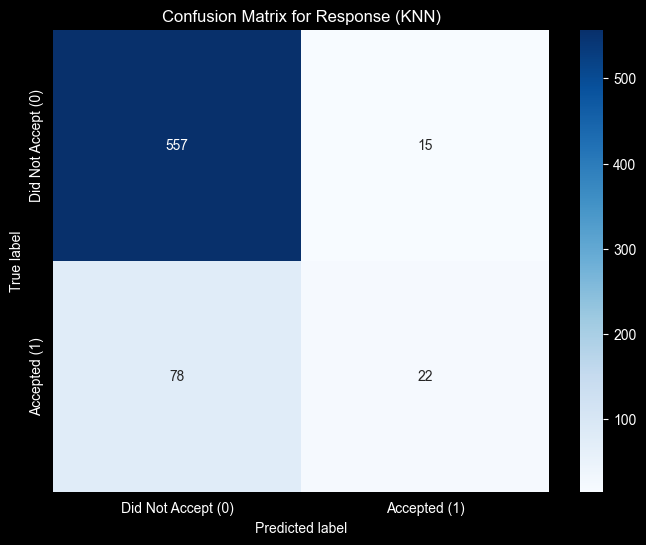

In [8]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d', # 'd' formats the numbers as integers
    cmap='Blues',
    xticklabels=['Did Not Accept (0)', 'Accepted (1)'],
    yticklabels=['Did Not Accept (0)', 'Accepted (1)']
)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title(f'Confusion Matrix for Response (KNN)')